# Projetinho de DS realizado com muito amor&carinho #

Importando as bibliotecas necessárias

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Selecionando o link e fazendo a sopa

In [2]:
link='https://scrapethissite.com/pages/forms/?page_num=1&per_page=582' 

source=requests.get(link).text

In [3]:
soup=BeautifulSoup(source,'html.parser')

In [4]:
table = soup.find_all('table',class_='table')[0]

In [5]:
soup.find_all('tr')

[<tr>
 <th>
                             Team Name
                         </th>
 <th>
                             Year
                         </th>
 <th>
                             Wins
                         </th>
 <th>
                             Losses
                         </th>
 <th>
                             OT Losses
                         </th>
 <th>
                             Win %
                         </th>
 <th>
                             Goals For (GF)
                         </th>
 <th>
                             Goals Against (GA)
                         </th>
 <th>
                             + / -
                         </th>
 </tr>, <tr class="team">
 <td class="name">
                             Boston Bruins
                         </td>
 <td class="year">
                             1990
                         </td>
 <td class="wins">
                             44
                         </td>
 <td class="losses">
           

In [6]:
soup.find_all('td')

[<td class="name">
                             Boston Bruins
                         </td>, <td class="year">
                             1990
                         </td>, <td class="wins">
                             44
                         </td>, <td class="losses">
                             24
                         </td>, <td class="ot-losses">
 </td>, <td class="pct text-success">
                             0.55
                         </td>, <td class="gf">
                             299
                         </td>, <td class="ga">
                             264
                         </td>, <td class="diff text-success">
                             35
                         </td>, <td class="name">
                             Buffalo Sabres
                         </td>, <td class="year">
                             1990
                         </td>, <td class="wins">
                             31
                         </td>, <td class="l

Testes para o processamento dos dados do site

In [7]:
test_w = soup.find_all('td', class_='wins')[0].text
test_w

'\n                            44\n                        '

In [8]:
test_n = soup.find_all('td', class_='name')[0].text
test_n

'\n                            Boston Bruins\n                        '

In [9]:
w = soup.find_all('td', class_='wins')
n = soup.find_all('td', class_='name')

In [10]:
len(n) == len(w)

True

In [11]:
len(n)

582

Funçãozinha marota pra coleta e organização dos dados

In [12]:
names = []
year= []
wins = []
losses = []
gf = []
ga = []

l = len(n)

for t in range(0,l):
        
    if t <= l-1:
        
        variablen = soup.find_all('td', class_='name')[t].text
        names.append(variablen)
         
        variabley = soup.find_all('td', class_='year')[t].text
        year.append(variabley)
    
        variablew = soup.find_all('td', class_='wins')[t].text
        wins.append(variablew)

        variablel = soup.find_all('td', class_='losses')[t].text
        losses.append(variablel)

        variablegf = soup.find_all('td', class_='gf')[t].text
        gf.append(variablegf)
    
        variablega = soup.find_all('td', class_='ga')[t].text
        ga.append(variablega)
            
    t = t + 1
        
    if t > l:
        break

Checagem

In [13]:
len(wins) == len(gf) == len(ga) == len(losses) == len(names) == len(year)

True

In [14]:
wins

['\n                            44\n                        ',
 '\n                            31\n                        ',
 '\n                            46\n                        ',
 '\n                            49\n                        ',
 '\n                            34\n                        ',
 '\n                            37\n                        ',
 '\n                            31\n                        ',
 '\n                            46\n                        ',
 '\n                            27\n                        ',
 '\n                            39\n                        ',
 '\n                            32\n                        ',
 '\n                            25\n                        ',
 '\n                            36\n                        ',
 '\n                            33\n                        ',
 '\n                            41\n                        ',
 '\n                            16\n                   

Criando o tão aguardado df

In [15]:
df = {'Names':names, 'Year':year, 'Wins': wins, 'Losses': losses, 'Goals For (GF)': gf, 'Goals Against (GA)': ga}

In [16]:
df = pd.DataFrame(df)

In [17]:
df.tail()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
577,\n Tampa Bay Lightn...,\n 2011\n ...,\n 38\n ...,\n 36\n ...,\n 235\n ...,\n 281\n ...
578,\n Toronto Maple Le...,\n 2011\n ...,\n 35\n ...,\n 37\n ...,\n 231\n ...,\n 264\n ...
579,\n Vancouver Canuck...,\n 2011\n ...,\n 51\n ...,\n 22\n ...,\n 249\n ...,\n 198\n ...
580,\n Washington Capit...,\n 2011\n ...,\n 42\n ...,\n 32\n ...,\n 222\n ...,\n 230\n ...
581,\n Winnipeg Jets\n ...,\n 2011\n ...,\n 37\n ...,\n 35\n ...,\n 225\n ...,\n 246\n ...


Vamos tirar essas paradas de '\n' e deixar bonitinho, aproveitar para classificar as variáveis entre categóricas e numéricas

In [18]:
def remove_units (DataFrame, columns, what):
    for col in columns:
        DataFrame[col] = DataFrame[col].str.strip(what)

In [19]:
remove_units(df, ['Names', 'Year', 'Wins', 'Losses', 'Goals For (GF)', 'Goals Against (GA)'], '\n \n')

In [20]:
df.head()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
0,Boston Bruins,1990,44,24,299,264
1,Buffalo Sabres,1990,31,30,292,278
2,Calgary Flames,1990,46,26,344,263
3,Chicago Blackhawks,1990,49,23,284,211
4,Detroit Red Wings,1990,34,38,273,298


In [21]:
numerical_cols = ['Wins', 'Losses', 'Goals For (GF)', 'Goals Against (GA)']


def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)
 

to_type(df, numerical_cols, 'float')

In [22]:
df.tail()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
577,Tampa Bay Lightning,2011,38.0,36.0,235.0,281.0
578,Toronto Maple Leafs,2011,35.0,37.0,231.0,264.0
579,Vancouver Canucks,2011,51.0,22.0,249.0,198.0
580,Washington Capitals,2011,42.0,32.0,222.0,230.0
581,Winnipeg Jets,2011,37.0,35.0,225.0,246.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 6 columns):
Names                 582 non-null object
Year                  582 non-null object
Wins                  582 non-null float64
Losses                582 non-null float64
Goals For (GF)        582 non-null float64
Goals Against (GA)    582 non-null float64
dtypes: float64(4), object(2)
memory usage: 27.4+ KB


### Vamos começar a visualização!

Primeiramente, é necessário observar a distribuição das variáveis!

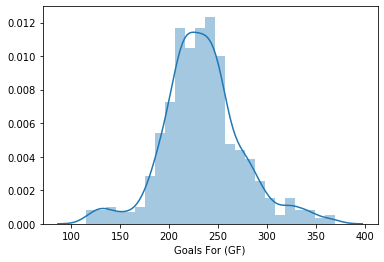

In [24]:
sns.distplot(df['Goals For (GF)'])

É possível notar uma grande concentração do número de Goals For (GF) entre 200 e 250, ou seja, a performance natural de um time é marcar entre 200 e 250 gols na temporada

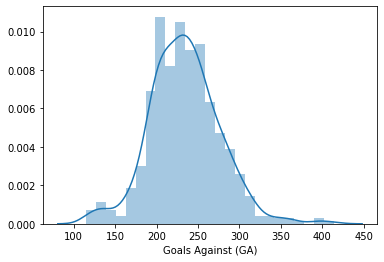

In [25]:
sns.distplot(df['Goals Against (GA)'])

Além disso, em termos de Goals Against, a faixa de maior ocorrência também se encontra entre 200 e 250. Obviamente, já que se alguém faz um gol, alguém toma um gol. Contudo, vale destacar que a zona entre 250 e 300 gols sofridos é representativa.

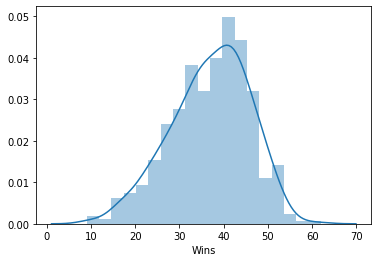

In [26]:
sns.distplot(df['Wins'])

Sim, as vitórias são essenciais, todos os times desejam o maior número de vitórias. Contudo, a maioria dos times permanece na zona entre 30 e 50, sendo esse o aproveitamento mais comum da liga, como era de se esperar. 

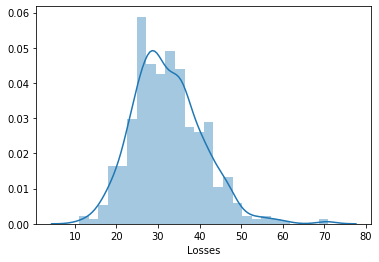

In [27]:
sns.distplot(df['Losses'])

Como era de se esperar, as derrotas se localizam na faixa entre 20 e 40, como complemento à zona de vitórias na formação de cerca de 70 jogos na temporada.

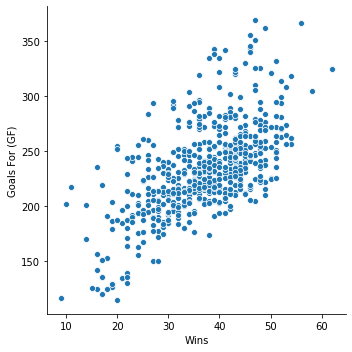

In [28]:
sns.relplot('Wins', 'Goals For (GF)', data=df)

Pode-se notar uma correlação positiva entre Goals For e Vitórias. Obviamente, já que, quanto maior o número de gols feitos, maior a probabilidade de se atingir a vitórias

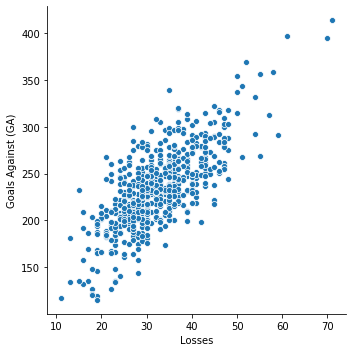

In [29]:
sns.relplot('Losses', 'Goals Against (GA)', data=df)

Da mesma forma, é possível estipular uma correlação positiva entre as derrotas e os gols sofridos, já que, quanto mais gols sofridos, maior a probabilidade de uma derrota.

In [30]:
df[df['Wins'] == df['Wins'].max()]

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
126,Detroit Red Wings,1995,62.0,13.0,325.0,181.0


O time mais vitorioso foi o Detroit Red Wings de 1995, o verdadeiro esquadrão.

In [31]:
df[df['Goals For (GF)'] == df['Goals For (GF)'].max()]

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
47,Detroit Red Wings,1992,47.0,28.0,369.0,280.0


Apesar de ser a equipe mais vitoriosa, o Detroit Red Wings de 1995 não é o time mais artilheiro do dataset. Sim, o time que marcou mais gol é o Detroit Red Wings, mas em 1992. Será que ele foi o time mais dominante no extrato temporal observado no dataset?  

In [32]:
dominance = df.groupby(by = df['Names']).sum()

In [33]:
dominance.sort_values('Wins', ascending = False).head()

,Wins,Losses,Goals For (GF),Goals Against (GA)
Names,,,,
Detroit Red Wings,986.0,480.0,5726.0,4489.0
New Jersey Devils,905.0,564.0,4942.0,4269.0
Pittsburgh Penguins,839.0,642.0,5557.0,5274.0
Philadelphia Flyers,836.0,598.0,5199.0,4762.0
Boston Bruins,816.0,614.0,5074.0,4823.0


Como podemos ver, o Detroit Red Wings é a equipe com o maior número de vitórias no período, realmente uma máquina de vencer. Ele vem seguido do New Jersey Devils, com uma diferença de 81 vitórias, impressionante...

In [34]:
df[df['Wins'] == df['Wins'].min()]

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
108,Ottawa Senators,1994,9.0,34.0,117.0,174.0


Por outro lado, o time com o menor número de vitórias foi o Ottawa Senators de 1994, só perna de pau.

In [35]:
df[df['Losses'] == df['Losses'].max()]

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
60,San Jose Sharks,1992,11.0,71.0,218.0,414.0


No hall da fama dos perdedores, se encontra o San Jose Sharks de 1992. Eles sofreram um total de 71 derrotas, triste demais...

In [36]:
df[df['Goals Against (GA)'] == df['Goals Against (GA)'].max()]

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA)
60,San Jose Sharks,1992,11.0,71.0,218.0,414.0


Os Sharks de 92 ainda foram responsáveis por levar várias sacoladas...414 gols sofridos, o recorde da série histórica

In [37]:
df['Aproveitamento'] = df['Wins']/(df['Wins'] + df['Losses'])

In [38]:
df[df['Aproveitamento'] == df['Aproveitamento'].max()]

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
126,Detroit Red Wings,1995,62.0,13.0,325.0,181.0,0.826667


É interessante avaliar a métrica de aproveitamento, visto que, em uma liga por exemplo, essa é a variável que realmente implica em título. Nesse sentido, o Detroit Red Wings de 95 seguem na ponta da tablea, com um aproveitamento de cerca 82,66%

In [39]:
df.sort_values('Aproveitamento', ascending = False).head()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
126,Detroit Red Wings,1995,62.0,13.0,325.0,181.0,0.826667
382,Detroit Red Wings,2005,58.0,16.0,305.0,209.0,0.783784
521,Washington Capitals,2009,54.0,15.0,318.0,233.0,0.782609
260,Colorado Avalanche,2000,52.0,16.0,270.0,192.0,0.764706
99,Detroit Red Wings,1994,33.0,11.0,180.0,117.0,0.750000


Dentre os 5 melhores aproveitamentos do dataset, 3 são do Detroit Red Wings, em 95, 95 e 2005. Eu queria muito ser torcedor desse time durante a década de 90 e início dos anos 2000!

### Outro df já coletado do site da ESPN...

In [40]:
data = pd.read_csv('C:/Users/guisg/Turing/DataSet ESPN.csv')

In [41]:
data.head()

,Unnamed: 0,Team,Home Games,Home Total,Home Average,Road Games,Road Average,Overall Games,Overall Average,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against
0,0,Montreal Canadiens,41,"824,308","20,105",41,"16,013",82,"18,059",2001,0.899,1020,1294
1,1,Detroit Red Wings,41,"819,795","19,995",41,"17,889",82,"18,942",2001,0.909,1082,1072
2,2,Philadelphia Flyers,41,"802,595","19,575",41,"17,182",82,"18,378",2001,0.903,1183,1332
3,3,St Louis Blues,41,"800,319","19,519",41,"16,898",82,"18,209",2001,0.899,1345,1366
4,4,Toronto Maple Leafs,41,"789,567","19,257",41,"17,172",82,"18,215",2001,0.908,1430,1243


In [42]:
data.tail()

,Unnamed: 0,Team,Home Games,Home Total,Home Average,Road Games,Road Average,Overall Games,Overall Average,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against
285,285,New Jersey Devils,41,"605,803","14,775",41,"17,789",82,"16,282",2011,0.904,765,787
286,286,Mighty Ducks of Anaheim,41,"604,283","14,738",41,"17,089",82,"15,914",2011,0.912,1178,1098
287,287,Columbus Blue Jackets,40,"546,350","13,658",40,"16,672",80,"15,165",2011,0.898,1113,1132
288,288,Phoenix Coyotes,40,"487,543","12,188",40,"16,719",80,"14,454",2011,0.918,863,832
289,289,New York Islanders,41,"453,456","11,059",41,"17,380",82,"14,220",2011,0.902,1515,1334


In [43]:
data['Overall Games'].unique()

array([82, 84, 80, 81], dtype=int64)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 13 columns):
Unnamed: 0                 290 non-null int64
Team                       290 non-null object
Home Games                 290 non-null int64
Home Total                 290 non-null object
Home Average               290 non-null object
Road Games                 290 non-null int64
Road Average               290 non-null object
Overall Games              290 non-null int64
Overall Average            290 non-null object
Year                       290 non-null int64
Save Percentage            290 non-null float64
Penalty Minutes            290 non-null int64
Penalty Minutes Against    290 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 29.5+ KB


Bora dropar o Unnamed: 0 inconveniente

In [45]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [46]:
data.head()

,Team,Home Games,Home Total,Home Average,Road Games,Road Average,Overall Games,Overall Average,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against
0,Montreal Canadiens,41,"824,308","20,105",41,"16,013",82,"18,059",2001,0.899,1020,1294
1,Detroit Red Wings,41,"819,795","19,995",41,"17,889",82,"18,942",2001,0.909,1082,1072
2,Philadelphia Flyers,41,"802,595","19,575",41,"17,182",82,"18,378",2001,0.903,1183,1332
3,St Louis Blues,41,"800,319","19,519",41,"16,898",82,"18,209",2001,0.899,1345,1366
4,Toronto Maple Leafs,41,"789,567","19,257",41,"17,172",82,"18,215",2001,0.908,1430,1243


Cara, algum mau elemento norte-americano tá usando vírgula ao invés de ponto, vamos ter que consertar

In [47]:
numerical_cols = ['Home Total', 'Home Average', 'Road Average', 'Overall Average']

In [48]:
len(data)

290

In [49]:
def SI(col):
    
    coluna = []
    
    l=len(data)
    
    for t in range(0,l):
        
        if t < l:
            w = data[col][t].replace(',', '.')
            coluna.append(w)
            
        if t == l:
            
            break
            
        t = t + 1
    
    return pd.DataFrame(coluna)
    

In [50]:
home_total = SI('Home Total')
home_total.rename(columns = {0: 'Home Total'}, inplace = True)

home_average = SI('Home Average')
home_average.rename(columns = {0: 'Home Average'}, inplace = True)

road_average = SI('Road Average')
road_average.rename(columns = {0: 'Road Average'}, inplace = True)

overall = SI('Overall Average')
overall.rename(columns = {0: 'Overall Average'}, inplace = True)

In [51]:
data_n = pd.concat([home_total, home_average, road_average, overall], axis = 1)
data_n.head()

,Home Total,Home Average,Road Average,Overall Average
0,824.308,20.105,16.013,18.059
1,819.795,19.995,17.889,18.942
2,802.595,19.575,17.182,18.378
3,800.319,19.519,16.898,18.209
4,789.567,19.257,17.172,18.215


In [52]:
data.drop(numerical_cols, axis = 1, inplace = True)

In [53]:
data = pd.concat([data, data_n], axis = 1)

In [54]:
to_type(data, numerical_cols, 'float')

In [55]:
data.head()

,Team,Home Games,Road Games,Overall Games,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against,Home Total,Home Average,Road Average,Overall Average
0,Montreal Canadiens,41,41,82,2001,0.899,1020,1294,824.308,20.105,16.013,18.059
1,Detroit Red Wings,41,41,82,2001,0.909,1082,1072,819.795,19.995,17.889,18.942
2,Philadelphia Flyers,41,41,82,2001,0.903,1183,1332,802.595,19.575,17.182,18.378
3,St Louis Blues,41,41,82,2001,0.899,1345,1366,800.319,19.519,16.898,18.209
4,Toronto Maple Leafs,41,41,82,2001,0.908,1430,1243,789.567,19.257,17.172,18.215


### Vamos começar a Visualização!

Primeiramente, bora ver como andam esses distplots...de lei

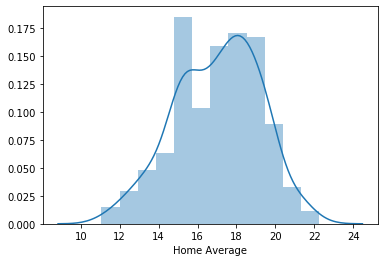

In [56]:
sns.distplot(data['Home Average'])

Nota-se que, no histograma, a região de 15 mil torcedores é a maior barra. A partir dela se inicia a zona de concentração. A zona de incidência de público mais comum em jogos em casa se encontra entre 15 e 19 mil torcedores, um nível de público bem inferior a outros esportes, como o futebol (fut>hockey)

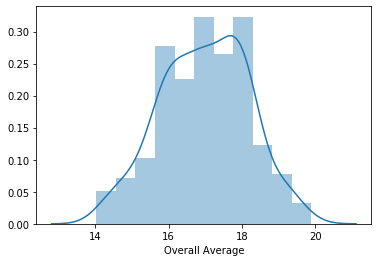

In [57]:
# if fut > hockey:
#   return sns.distplot(data['Overall Average'])

sns.distplot(data['Overall Average'])

Aqui é possível perceber que a zona de concentração mais comum de público se encontra entre 16 e 18 mil torcedores para jogos em geral

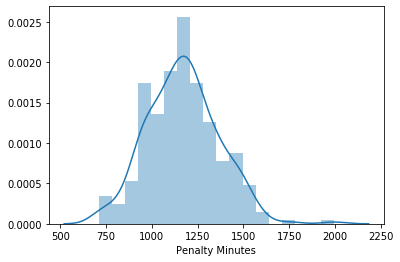

In [58]:
sns.distplot(data['Penalty Minutes'])

Penalty quer dizer que deu treta, então quanto mais menor. Aqui é possível notar que a maior parte dos times analisados possuiu entre 1000 e 1400 minutos de penalty na temporada. Pessoal curte uma briga.

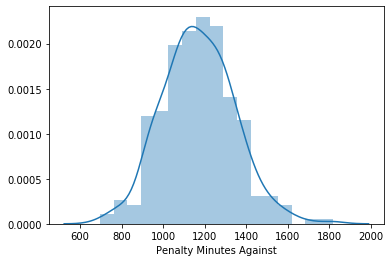

In [59]:
sns.distplot(data['Penalty Minutes Against'])

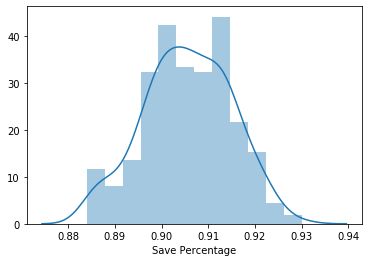

In [60]:
sns.distplot(data['Save Percentage'])

Agora vamos fazer um heatmap e explorar as correlações encontradas

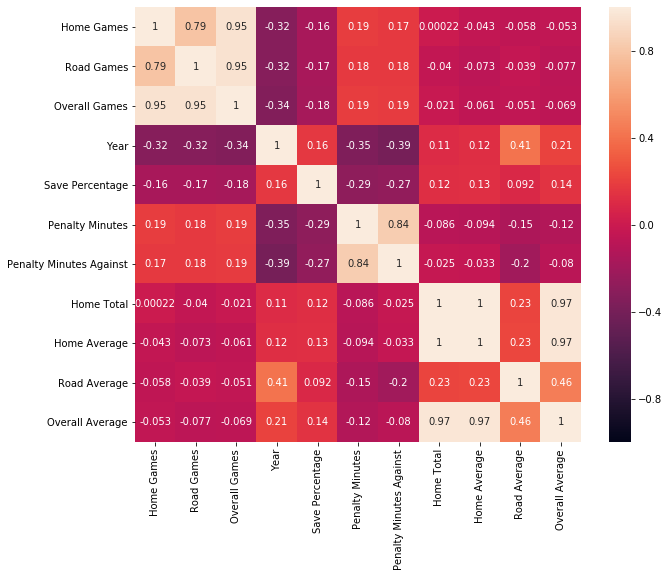

In [61]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

Parece que encontramos uma correlação negativa entre penalty minutes against e save percentage

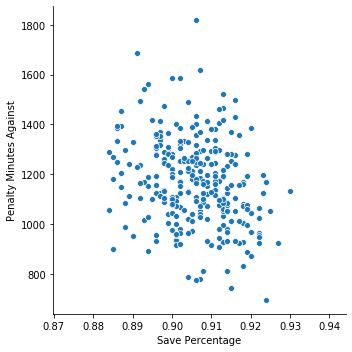

In [62]:
sns.relplot('Save Percentage', 'Penalty Minutes Against', data=data)

Para visualizar melhor, vamos fazer uso de um lmplot

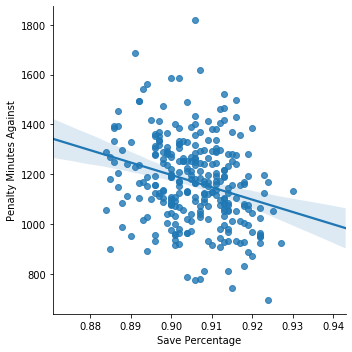

In [63]:
sns.lmplot('Save Percentage', 'Penalty Minutes Against', data=data)

Sim! Uma reta de inclinação negativa. Podemos deferir então que os goleiros tem suas probabilidade de defesa reduzidas a cada vez que são expostos a um penalty 

Será que, quanto mais gente na torcida em casa, maior a porcentagem de defesas?

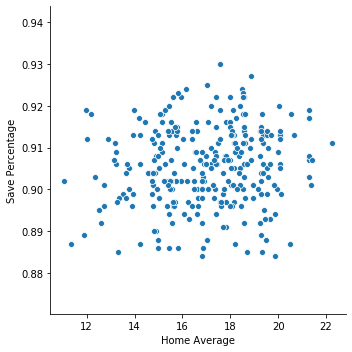

In [64]:
sns.relplot('Home Average', 'Save Percentage', data=data)

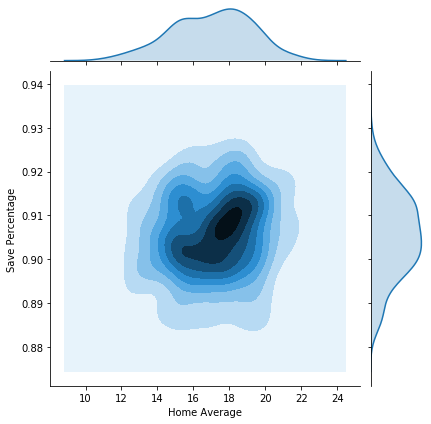

In [65]:
sns.jointplot('Home Average', 'Save Percentage', data=data, kind='kde')

Não há tendência necessária para comprover essa hipótese. Pode-se notar uma grande concentração de times em uma faixa de ocorrência pequena das duas variáveis, com 18 mil pessoas em Home Average e 91% de porcentagem de defesa.

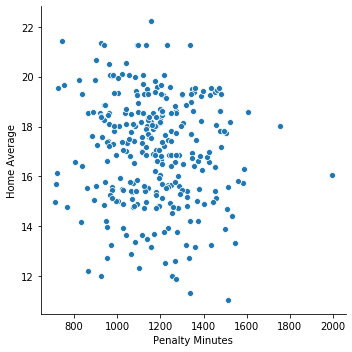

In [66]:
sns.relplot('Penalty Minutes', 'Home Average', data=data)

É possível notar uma leve tendência decrescente entre o tamanho da torcida em casa e os minutos de penalty. Os adversários ficam mais nervosos e agressivos quando a casa está cheia...

Será que ao longo dos anos a violência (com base nos minutos de penalty), aumentou ou diminui?

In [67]:
to_type(data, ['Year'], 'str')

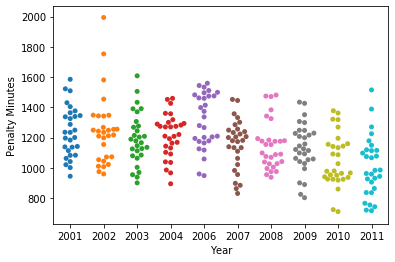

In [68]:
sns.swarmplot('Year', 'Penalty Minutes', data=data)

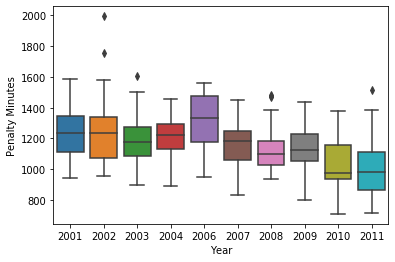

In [69]:
sns.boxplot('Year', 'Penalty Minutes', data=data)

Com base na análise dos gráficos acima, nota-se uma tendência decrescente de penalty minutes, ou seja, menos penalties sendo cometidos. Tal tendência de decrescimento mostra-se especialmente mais forte a partir de 2006.

Agora vamos a algumas comparações entre os times

In [70]:
data['Team'].unique()

array(['Montreal Canadiens', 'Detroit Red Wings', 'Philadelphia Flyers',
       'St Louis Blues', 'Toronto Maple Leafs', 'Minnesota North Stars',
       'New York Rangers', 'Colorado Avalanche', 'Buffalo Sabres',
       'Ottawa Senators', 'San Jose Sharks', 'Columbus Blue Jackets',
       'Vancouver Canucks', 'Dallas Stars', 'Calgary Flames',
       'Pittsburgh Penguins', 'Los Angeles Kings', 'Nashville Predators',
       'New Jersey Devils', 'Edmonton Oilers', 'Washington Capitals',
       'Boston Bruins', 'Chicago Blackhawks', 'Tampa Bay Lightning',
       'Florida Panthers', 'Phoenix Coyotes', 'Mighty Ducks of Anaheim',
       'Carolina Hurricanes', 'New York Islanders'], dtype=object)

Primeiro, vamos observar se uma média de público alta em casa é o necessário para garantir a mesma posição fora de casa

In [71]:
do = data['Overall Average'].groupby(data['Team']).sum()
do.sort_values(ascending=False)

Team
Montreal Canadiens         189.981
Detroit Red Wings          189.050
Philadelphia Flyers        182.865
Toronto Maple Leafs        182.745
New York Rangers           178.953
Vancouver Canucks          176.479
Minnesota North Stars      175.330
Ottawa Senators            174.844
Calgary Flames             174.145
Buffalo Sabres             172.765
St Louis Blues             172.054
Dallas Stars               171.737
Colorado Avalanche         171.077
Los Angeles Kings          169.568
San Jose Sharks            169.494
Chicago Blackhawks         168.742
Pittsburgh Penguins        168.543
Tampa Bay Lightning        168.528
Edmonton Oilers            168.120
Boston Bruins              167.003
Washington Capitals        165.281
Columbus Blue Jackets      164.135
New Jersey Devils          161.809
Carolina Hurricanes        160.402
Mighty Ducks of Anaheim    159.870
Florida Panthers           159.867
Nashville Predators        156.295
Phoenix Coyotes            153.627
New York Island

In [72]:
dh = data['Home Average'].groupby(data['Team']).mean()
dh.sort_values(ascending=False)

Team
Montreal Canadiens         20.8997
Detroit Red Wings          19.8268
Philadelphia Flyers        19.5130
Toronto Maple Leafs        19.3407
Minnesota North Stars      18.4494
Vancouver Canucks          18.3954
Ottawa Senators            18.3931
New York Rangers           18.1364
Calgary Flames             18.0892
St Louis Blues             17.6547
Dallas Stars               17.6168
Buffalo Sabres             17.5149
Tampa Bay Lightning        17.3332
San Jose Sharks            17.2347
Los Angeles Kings          17.1459
Colorado Avalanche         16.8685
Edmonton Oilers            16.7564
Chicago Blackhawks         16.6496
Columbus Blue Jackets      16.3343
Washington Capitals        16.1459
Pittsburgh Penguins        16.0150
Boston Bruins              15.9348
Florida Panthers           15.5389
Carolina Hurricanes        15.4717
New Jersey Devils          15.1554
Mighty Ducks of Anaheim    15.0085
Nashville Predators        14.7668
Phoenix Coyotes            14.0527
New York Island

In [73]:
comp = pd.concat([do, dh], axis = 1)
comp.sort_values(by = 'Overall Average', ascending = False)

,Overall Average,Home Average
Team,,
Montreal Canadiens,189.981,20.8997
Detroit Red Wings,189.050,19.8268
Philadelphia Flyers,182.865,19.5130
Toronto Maple Leafs,182.745,19.3407
New York Rangers,178.953,18.1364
Vancouver Canucks,176.479,18.3954
Minnesota North Stars,175.330,18.4494
Ottawa Senators,174.844,18.3931
Calgary Flames,174.145,18.0892


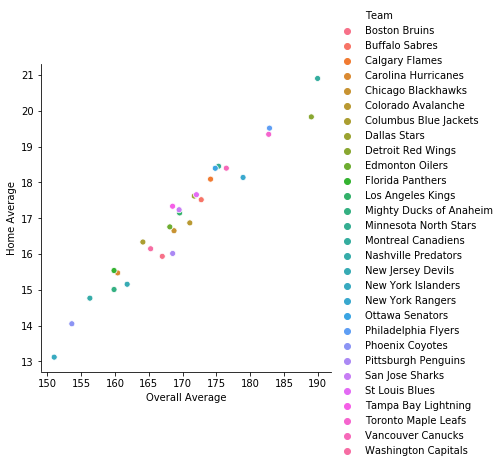

In [74]:
sns.relplot('Overall Average', 'Home Average', data=comp, kind='scatter', hue=comp.index)

Aqui percebemos que existe uma lineariedade grande entre as variáveis, contudo a classificação do time em termos de público em casa não garante a classificação em média de público geral ao longo da temporada, principalmente para os times entre 160 e 180 mil pessoas de Overall Average.

# Hipótese: Quem com ferro fere, com ferro será ferido

Os times com mais penaltis a favor, são os mesmos com mais penaltis contrários, ou será que eles apanham e não batem de volta?

In [75]:
dpm = data['Penalty Minutes'].groupby(data['Team']).mean()
dpm.sort_values(ascending=False)

Team
St Louis Blues             1311.0
Calgary Flames             1308.0
New York Rangers           1292.9
Pittsburgh Penguins        1291.2
Mighty Ducks of Anaheim    1279.2
Philadelphia Flyers        1267.3
Columbus Blue Jackets      1266.8
Vancouver Canucks          1262.5
Toronto Maple Leafs        1230.9
Edmonton Oilers            1229.1
Phoenix Coyotes            1225.3
New York Islanders         1205.6
Ottawa Senators            1201.2
Boston Bruins              1195.2
Florida Panthers           1190.1
Chicago Blackhawks         1182.4
Los Angeles Kings          1166.8
Buffalo Sabres             1139.6
Washington Capitals        1134.8
Dallas Stars               1128.7
San Jose Sharks            1104.3
Tampa Bay Lightning        1102.2
Montreal Canadiens         1075.4
Colorado Avalanche         1074.5
Nashville Predators        1050.7
Minnesota North Stars      1047.2
Carolina Hurricanes        1034.7
Detroit Red Wings           965.2
New Jersey Devils           951.1
Name: Pen

In [76]:
dpma = data['Penalty Minutes Against'].groupby(data['Team']).mean()
dpma.sort_values(ascending=False)

Team
Calgary Flames             1303.3
Vancouver Canucks          1282.9
St Louis Blues             1281.0
Pittsburgh Penguins        1269.7
Columbus Blue Jackets      1265.7
Mighty Ducks of Anaheim    1242.5
New York Rangers           1226.2
Philadelphia Flyers        1220.3
Ottawa Senators            1218.9
Edmonton Oilers            1216.9
Los Angeles Kings          1197.0
Toronto Maple Leafs        1196.1
Carolina Hurricanes        1195.9
Buffalo Sabres             1195.7
San Jose Sharks            1184.8
Dallas Stars               1173.1
Phoenix Coyotes            1166.1
Boston Bruins              1140.9
New York Islanders         1131.2
Florida Panthers           1122.0
Nashville Predators        1121.7
Tampa Bay Lightning        1113.7
Montreal Canadiens         1111.6
Chicago Blackhawks         1110.3
Colorado Avalanche         1101.6
Minnesota North Stars      1094.7
Washington Capitals        1073.2
New Jersey Devils           994.3
Detroit Red Wings           984.9
Name: Pen

In [77]:
comppen = pd.concat([dpm, dpma], axis = 1)
comppen.sort_values(by = 'Penalty Minutes', ascending = False)

,Penalty Minutes,Penalty Minutes Against
Team,,
St Louis Blues,1311.0,1281.0
Calgary Flames,1308.0,1303.3
New York Rangers,1292.9,1226.2
Pittsburgh Penguins,1291.2,1269.7
Mighty Ducks of Anaheim,1279.2,1242.5
Philadelphia Flyers,1267.3,1220.3
Columbus Blue Jackets,1266.8,1265.7
Vancouver Canucks,1262.5,1282.9
Toronto Maple Leafs,1230.9,1196.1


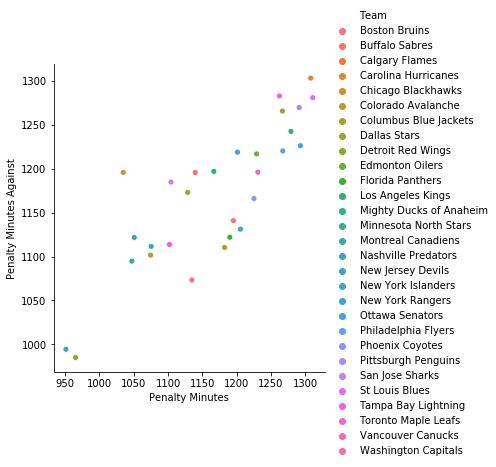

In [78]:
sns.relplot('Penalty Minutes', 'Penalty Minutes Against', data=comppen, kind='scatter', hue=comppen.index)

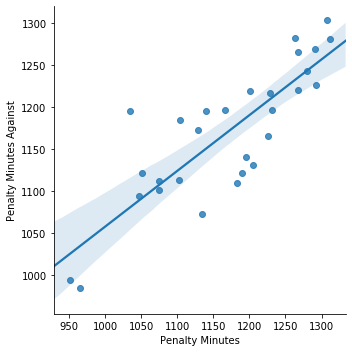

In [79]:
sns.lmplot('Penalty Minutes', 'Penalty Minutes Against', data=comppen)

Com base nesses gráficos, pode-se depreender que existe uma forte correlação entre os minutos de penaltis favoráveis e contrários, ou seja, se você conhece um jogador de hockey não bata nele, achance dele revidar é bem grande

# Hipótese: A prática leva a perfeição

Será que quanto mais são expostos a penaltis, os goleiros melhoram de produção (supondo a manutenção dos mesmos goleiros)?

In [83]:
to_type(data, ['Year'], 'int')

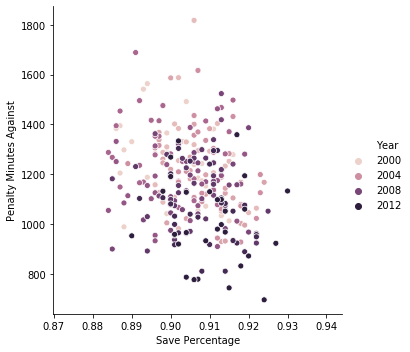

In [84]:
sns.relplot('Save Percentage', 'Penalty Minutes Against', data=data, hue='Year')

A partir da análise do gráfico, chegamos a conclusão que não necessariamente. Existe uma leve tendência à direita (aumento da Save Percentage) da nuvem de pontos a medida que os pontos escurecem (temporadas mais recentes), contudo ela não é clara o suficiente para se chegar a uma conclusão. Ou os goleiros não melhoram com o tempo, ou os goleiros são trocados frequentemente. Realmente, em um esporte de alto nível, a melhora da produtividade é muito difícil.

Especial Gráfico Transcendental

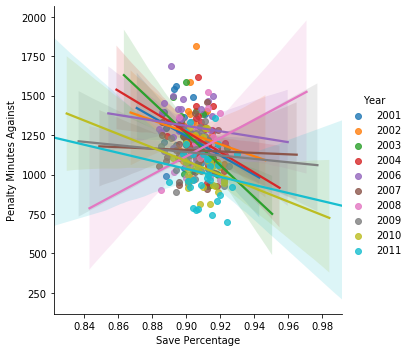

In [85]:
sns.lmplot('Save Percentage', 'Penalty Minutes Against', data=data, hue='Year')

Especial Gráfico Transcendental

Será que a porcentagem de defesas aumentam ou diminuem com maior exposição dos goleiros em penalties?

In [86]:
dsp = data['Save Percentage'].groupby(data['Team']).mean()
dsp.sort_values(ascending=False)

Team
Minnesota North Stars      0.9139
Florida Panthers           0.9126
Montreal Canadiens         0.9121
Mighty Ducks of Anaheim    0.9113
Nashville Predators        0.9112
New Jersey Devils          0.9109
San Jose Sharks            0.9097
Boston Bruins              0.9093
Buffalo Sabres             0.9087
Detroit Red Wings          0.9080
Vancouver Canucks          0.9080
Philadelphia Flyers        0.9068
New York Rangers           0.9065
Phoenix Coyotes            0.9062
Ottawa Senators            0.9059
Calgary Flames             0.9055
Colorado Avalanche         0.9052
Dallas Stars               0.9049
Washington Capitals        0.9043
Columbus Blue Jackets      0.9016
Carolina Hurricanes        0.9012
New York Islanders         0.9008
Edmonton Oilers            0.9007
Pittsburgh Penguins        0.9007
Los Angeles Kings          0.9000
Chicago Blackhawks         0.8991
St Louis Blues             0.8989
Toronto Maple Leafs        0.8984
Tampa Bay Lightning        0.8979
Name: Sav

In [87]:
compsp = pd.concat([dsp, dpma], axis = 1)
compsp.sort_values(by = 'Save Percentage', ascending = False)

,Save Percentage,Penalty Minutes Against
Team,,
Minnesota North Stars,0.9139,1094.7
Florida Panthers,0.9126,1122.0
Montreal Canadiens,0.9121,1111.6
Mighty Ducks of Anaheim,0.9113,1242.5
Nashville Predators,0.9112,1121.7
New Jersey Devils,0.9109,994.3
San Jose Sharks,0.9097,1184.8
Boston Bruins,0.9093,1140.9
Buffalo Sabres,0.9087,1195.7


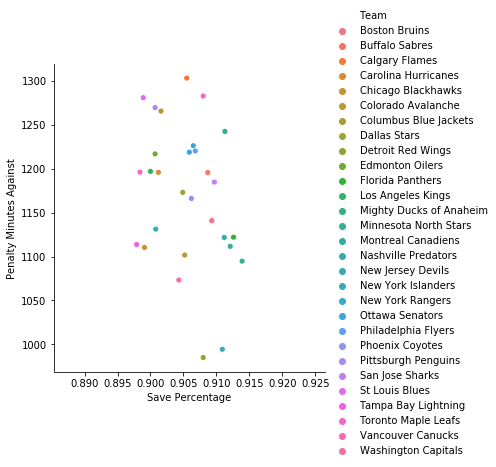

In [88]:
sns.relplot('Save Percentage', 'Penalty Minutes Against', data=compsp, kind='scatter', hue=compsp.index)

Nooo. Não é possível observar nenhuma tendência no dataset );

Bora conferir quem mais "Penalty Minutes Saved" ao multiplicar a Save Percentage pelos Penalty Minutes Against

In [89]:
compsp['Penalty Minutes Saved'] = compsp['Penalty Minutes Against'] * compsp['Save Percentage']

In [90]:
compsp['Penalty Minutes Saved'].sort_values(ascending=False)

Team
Calgary Flames             1180.13815
Vancouver Canucks          1164.87320
St Louis Blues             1151.49090
Pittsburgh Penguins        1143.61879
Columbus Blue Jackets      1141.15512
Mighty Ducks of Anaheim    1132.29025
New York Rangers           1111.55030
Philadelphia Flyers        1106.56804
Ottawa Senators            1104.20151
Edmonton Oilers            1096.06183
Buffalo Sabres             1086.53259
San Jose Sharks            1077.81256
Carolina Hurricanes        1077.74508
Los Angeles Kings          1077.30000
Toronto Maple Leafs        1074.57624
Dallas Stars               1061.53819
Phoenix Coyotes            1056.71982
Boston Bruins              1037.42037
Florida Panthers           1023.93720
Nashville Predators        1022.09304
New York Islanders         1018.98496
Montreal Canadiens         1013.89036
Minnesota North Stars      1000.44633
Tampa Bay Lightning         999.99123
Chicago Blackhawks          998.27073
Colorado Avalanche          997.16832
Washing

Os goleirões do Calgary Flames se deram bem, na média salvaram mais

### Hipótese: Vou pro Estádio pra ver Sangue?

Será que a torcida vai pro estádio pra ver violência? Para responder a este questionamento, é preciso comparar a média de público com os penalties.

In [91]:
go_stadium = pd.concat([comp, comppen], axis=1)

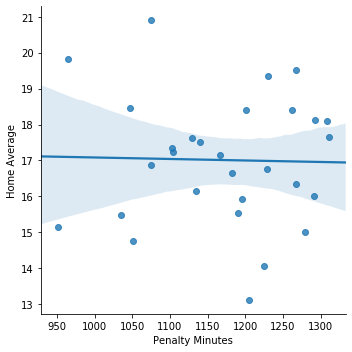

In [92]:
sns.lmplot('Penalty Minutes', 'Home Average', data=go_stadium)

Naooo. Uma barra praticamente horizontal, penalty e público não conversam muito bem...

### Hipótese: Flamengo maior do mundo (Nação)

Vamos ver quem chega mais próximo ao tamanho do flamengo e tem a maior soma de torcidas nas temporadas

In [93]:
ht = data['Home Total'].groupby(data['Team']).sum()
ht.sort_values(ascending=False)

Team
Montreal Canadiens         8568.960
Detroit Red Wings          8109.518
Philadelphia Flyers        8000.490
Toronto Maple Leafs        7929.839
Minnesota North Stars      7546.459
Vancouver Canucks          7542.170
Ottawa Senators            7541.346
New York Rangers           7436.045
Calgary Flames             7397.381
Dallas Stars               7223.018
St Louis Blues             7219.690
Buffalo Sabres             7181.272
Tampa Bay Lightning        7106.833
San Jose Sharks            7048.861
Los Angeles Kings          7029.982
Colorado Avalanche         6916.215
Edmonton Oilers            6870.270
Chicago Blackhawks         6805.192
Columbus Blue Jackets      6683.556
Washington Capitals        6619.985
Pittsburgh Penguins        6564.362
Boston Bruins              6498.514
Florida Panthers           6355.955
Carolina Hurricanes        6327.208
New Jersey Devils          6213.956
Mighty Ducks of Anaheim    6153.651
Nashville Predators        6070.366
Phoenix Coyotes        

PARABÉNS AOS TORCEDORES DO MONTREAL CANADIENS, PRÊMIO DS-TURING DE TORCIDA APAIXONADA!

Vamos unir os dados dos dois dfs e ver o que conseguimos fazer!

In [94]:
df.head()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
0,Boston Bruins,1990,44.0,24.0,299.0,264.0,0.647059
1,Buffalo Sabres,1990,31.0,30.0,292.0,278.0,0.508197
2,Calgary Flames,1990,46.0,26.0,344.0,263.0,0.638889
3,Chicago Blackhawks,1990,49.0,23.0,284.0,211.0,0.680556
4,Detroit Red Wings,1990,34.0,38.0,273.0,298.0,0.472222


In [95]:
df.tail()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
577,Tampa Bay Lightning,2011,38.0,36.0,235.0,281.0,0.513514
578,Toronto Maple Leafs,2011,35.0,37.0,231.0,264.0,0.486111
579,Vancouver Canucks,2011,51.0,22.0,249.0,198.0,0.698630
580,Washington Capitals,2011,42.0,32.0,222.0,230.0,0.567568
581,Winnipeg Jets,2011,37.0,35.0,225.0,246.0,0.513889


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 7 columns):
Names                 582 non-null object
Year                  582 non-null int32
Wins                  582 non-null float64
Losses                582 non-null float64
Goals For (GF)        582 non-null float64
Goals Against (GA)    582 non-null float64
Aproveitamento        582 non-null float64
dtypes: float64(5), int32(1), object(1)
memory usage: 29.6+ KB


In [97]:
to_type(df, ['Year'], 'int')

In [98]:
df = df[df['Year'] > 2000]

In [99]:
df.head()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
282,Mighty Ducks of Anaheim,2001,29.0,42.0,175.0,198.0,0.408451
283,Atlanta Thrashers,2001,19.0,47.0,187.0,288.0,0.287879
284,Boston Bruins,2001,43.0,24.0,236.0,201.0,0.641791
285,Buffalo Sabres,2001,35.0,35.0,213.0,200.0,0.500000
286,Calgary Flames,2001,32.0,35.0,201.0,220.0,0.477612


In [100]:
df.Names.unique()

array(['Mighty Ducks of Anaheim', 'Atlanta Thrashers', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Carolina Hurricanes',
       'Columbus Blue Jackets', 'Chicago Blackhawks',
       'Colorado Avalanche', 'Dallas Stars', 'Detroit Red Wings',
       'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
       'Minnesota Wild', 'Montreal Canadiens', 'Nashville Predators',
       'New Jersey Devils', 'New York Islanders', 'New York Rangers',
       'Ottawa Senators', 'Philadelphia Flyers', 'Phoenix Coyotes',
       'Pittsburgh Penguins', 'San Jose Sharks', 'St. Louis Blues',
       'Tampa Bay Lightning', 'Toronto Maple Leafs', 'Vancouver Canucks',
       'Washington Capitals', 'Anaheim Ducks', 'Winnipeg Jets'],
      dtype=object)

In [101]:
data.Team.unique()

array(['Montreal Canadiens', 'Detroit Red Wings', 'Philadelphia Flyers',
       'St Louis Blues', 'Toronto Maple Leafs', 'Minnesota North Stars',
       'New York Rangers', 'Colorado Avalanche', 'Buffalo Sabres',
       'Ottawa Senators', 'San Jose Sharks', 'Columbus Blue Jackets',
       'Vancouver Canucks', 'Dallas Stars', 'Calgary Flames',
       'Pittsburgh Penguins', 'Los Angeles Kings', 'Nashville Predators',
       'New Jersey Devils', 'Edmonton Oilers', 'Washington Capitals',
       'Boston Bruins', 'Chicago Blackhawks', 'Tampa Bay Lightning',
       'Florida Panthers', 'Phoenix Coyotes', 'Mighty Ducks of Anaheim',
       'Carolina Hurricanes', 'New York Islanders'], dtype=object)

In [102]:
teams_1 = df['Names'].unique()
teams_2 = data['Team'].unique()

In [103]:
teams = set(teams_1) & set(teams_2)
teams

{'Boston Bruins',
 'Buffalo Sabres',
 'Calgary Flames',
 'Carolina Hurricanes',
 'Chicago Blackhawks',
 'Colorado Avalanche',
 'Columbus Blue Jackets',
 'Dallas Stars',
 'Detroit Red Wings',
 'Edmonton Oilers',
 'Florida Panthers',
 'Los Angeles Kings',
 'Mighty Ducks of Anaheim',
 'Montreal Canadiens',
 'Nashville Predators',
 'New Jersey Devils',
 'New York Islanders',
 'New York Rangers',
 'Ottawa Senators',
 'Philadelphia Flyers',
 'Phoenix Coyotes',
 'Pittsburgh Penguins',
 'San Jose Sharks',
 'Tampa Bay Lightning',
 'Toronto Maple Leafs',
 'Vancouver Canucks',
 'Washington Capitals'}

In [104]:
teams = pd.DataFrame(teams)
teams.head()

,0
0,Vancouver Canucks
1,Carolina Hurricanes
2,Edmonton Oilers
3,Mighty Ducks of Anaheim
4,Calgary Flames


In [105]:
len(teams)

27

In [106]:
teams[0][7]

'Toronto Maple Leafs'

In [107]:
data.head()

,Team,Home Games,Road Games,Overall Games,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against,Home Total,Home Average,Road Average,Overall Average
0,Montreal Canadiens,41,41,82,2001,0.899,1020,1294,824.308,20.105,16.013,18.059
1,Detroit Red Wings,41,41,82,2001,0.909,1082,1072,819.795,19.995,17.889,18.942
2,Philadelphia Flyers,41,41,82,2001,0.903,1183,1332,802.595,19.575,17.182,18.378
3,St Louis Blues,41,41,82,2001,0.899,1345,1366,800.319,19.519,16.898,18.209
4,Toronto Maple Leafs,41,41,82,2001,0.908,1430,1243,789.567,19.257,17.172,18.215


In [108]:
df_new = pd.DataFrame()
    
w = teams[0][1]
a = df[df['Names'] == w]
df_new = pd.concat([df_new, a], axis=0)
df_new

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
287,Carolina Hurricanes,2001,35.0,26.0,217.0,217.0,0.573770
317,Carolina Hurricanes,2002,22.0,43.0,171.0,240.0,0.338462
347,Carolina Hurricanes,2003,28.0,34.0,172.0,209.0,0.451613
377,Carolina Hurricanes,2005,52.0,22.0,294.0,260.0,0.702703
407,Carolina Hurricanes,2006,40.0,34.0,241.0,253.0,0.540541
437,Carolina Hurricanes,2007,43.0,33.0,252.0,249.0,0.565789
467,Carolina Hurricanes,2008,45.0,30.0,239.0,226.0,0.600000
497,Carolina Hurricanes,2009,35.0,37.0,230.0,256.0,0.486111
527,Carolina Hurricanes,2010,40.0,31.0,236.0,239.0,0.563380
556,Carolina Hurricanes,2011,33.0,33.0,213.0,243.0,0.500000


In [110]:
def separate_teams(df):
    
    df_new = pd.DataFrame()
    l = len(teams)
    t = 0
    
    for t in range(0,l+1):
        
        if t < l:
            
            w = teams[0][t]
            a = df[df['Names'] == w]
            a = a[a['Year'] >=  2001]
            df_new = pd.concat([df_new, a], axis = 0)
    
        
        if t == l:
            break
        
        t =+ 1
        
    return df_new

In [111]:
df_new1 = separate_teams(df)

In [112]:
def separate_teams2(df):
    
    df_new = pd.DataFrame()
    l = len(teams)
    t = 0
    
    for t in range(0,l+1):
        
        if t < l:
            
            w = teams[0][t]
            a = df[df['Team'] == w]
            a = a[a['Year'] >=  2001]
            df_new = pd.concat([df_new, a], axis = 0)
    
        
        if t == l:
            break
        
        t =+ 1
        
    return df_new

In [113]:
df_new2 = separate_teams2(data)

In [114]:
df_new1.head()

,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento
310,Vancouver Canucks,2001,42.0,30.0,254.0,211.0,0.583333
340,Vancouver Canucks,2002,45.0,23.0,264.0,208.0,0.661765
370,Vancouver Canucks,2003,43.0,24.0,235.0,194.0,0.641791
400,Vancouver Canucks,2005,42.0,32.0,256.0,255.0,0.567568
430,Vancouver Canucks,2006,49.0,26.0,222.0,201.0,0.653333


In [115]:
df_new1.Names.unique()

array(['Vancouver Canucks', 'Carolina Hurricanes', 'Edmonton Oilers',
       'Mighty Ducks of Anaheim', 'Calgary Flames', 'Boston Bruins',
       'Dallas Stars', 'Toronto Maple Leafs', 'Detroit Red Wings',
       'Colorado Avalanche', 'Montreal Canadiens', 'Ottawa Senators',
       'New York Rangers', 'Los Angeles Kings', 'Tampa Bay Lightning',
       'Nashville Predators', 'San Jose Sharks', 'New Jersey Devils',
       'Pittsburgh Penguins', 'New York Islanders', 'Phoenix Coyotes',
       'Columbus Blue Jackets', 'Chicago Blackhawks', 'Buffalo Sabres',
       'Florida Panthers', 'Washington Capitals', 'Philadelphia Flyers'],
      dtype=object)

In [116]:
df_new2.head()

,Team,Home Games,Road Games,Overall Games,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against,Home Total,Home Average,Road Average,Overall Average
12,Vancouver Canucks,41,41,82,2001,0.888,1113,1298,698.077,17.026,16.767,16.896
39,Vancouver Canucks,41,41,82,2002,0.899,1342,1310,726.226,17.712,16.313,17.012
65,Vancouver Canucks,41,41,82,2003,0.905,1178,1269,754.247,18.396,16.611,17.503
91,Vancouver Canucks,41,41,82,2004,0.911,1274,1288,763.830,18.630,16.843,17.736
123,Vancouver Canucks,41,41,82,2006,0.898,1475,1476,763.830,18.630,16.892,17.761


In [119]:
df_new2.Team.unique()

array(['Vancouver Canucks', 'Carolina Hurricanes', 'Edmonton Oilers',
       'Mighty Ducks of Anaheim', 'Calgary Flames', 'Boston Bruins',
       'Dallas Stars', 'Toronto Maple Leafs', 'Detroit Red Wings',
       'Colorado Avalanche', 'Montreal Canadiens', 'Ottawa Senators',
       'New York Rangers', 'Los Angeles Kings', 'Tampa Bay Lightning',
       'Nashville Predators', 'San Jose Sharks', 'New Jersey Devils',
       'Pittsburgh Penguins', 'New York Islanders', 'Phoenix Coyotes',
       'Columbus Blue Jackets', 'Chicago Blackhawks', 'Buffalo Sabres',
       'Florida Panthers', 'Washington Capitals', 'Philadelphia Flyers'],
      dtype=object)

In [120]:
len(df_new1)

264

In [121]:
len(df_new2)

270

In [122]:
df_new1 = df_new1[df_new1['Names'] != 'Mighty Ducks of Anaheim']
df_new2 = df_new2[df_new2['Team'] != 'Mighty Ducks of Anaheim']

In [123]:
to_type(df_new1, ['Year'], 'str')
to_type(df_new2, ['Year'], 'str')

C:\Users\guisg\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
df_new1.reset_index(inplace=True)

In [125]:
df_new2.reset_index(inplace=True)

In [126]:
df_new = pd.concat([df_new1, df_new2], axis = 1)

In [127]:
df_new.tail()

,index,Names,Year,Wins,Losses,Goals For (GF),Goals Against (GA),Aproveitamento,index,Team,...,Road Games,Overall Games,Year,Save Percentage,Penalty Minutes,Penalty Minutes Against,Home Total,Home Average,Road Average,Overall Average
255,453,Philadelphia Flyers,2007,42.0,29.0,248.0,233.0,0.591549,151,Philadelphia Flyers,...,41,82,2007,0.889,1301,1114,790.591,19.282,16.658,17.970
256,483,Philadelphia Flyers,2008,44.0,27.0,264.0,238.0,0.619718,177,Philadelphia Flyers,...,41,82,2008,0.913,1471,1419,801.797,19.556,17.317,18.436
257,513,Philadelphia Flyers,2009,41.0,35.0,236.0,225.0,0.539474,206,Philadelphia Flyers,...,41,82,2009,0.913,1434,1217,801.372,19.545,17.544,18.544
258,543,Philadelphia Flyers,2010,47.0,23.0,259.0,223.0,0.671429,235,Philadelphia Flyers,...,40,81,2010,0.905,1362,1253,800.966,19.535,16.830,18.200
259,572,Philadelphia Flyers,2011,47.0,26.0,264.0,232.0,0.643836,263,Philadelphia Flyers,...,41,82,2011,0.913,1119,1099,808.328,19.715,17.525,18.620


In [128]:
df_new.drop('index', axis = 1, inplace = True)

In [129]:
df_new.drop('Team', axis = 1, inplace = True)

Unimos os dfs, vamos dar uma olhada...

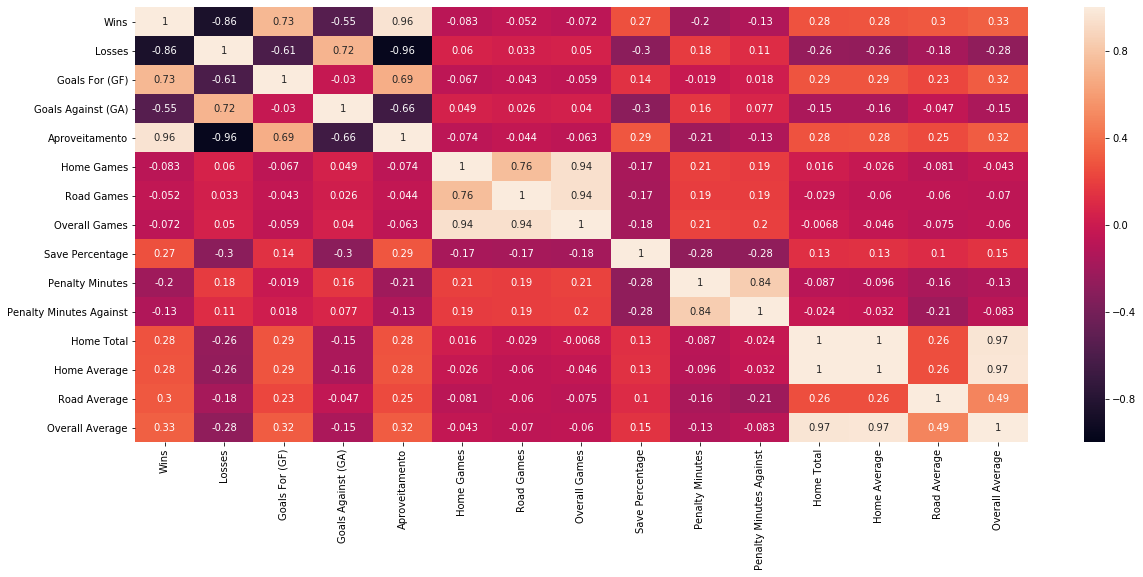

In [130]:
plt.figure(figsize=(20,8))

sns.heatmap(df_new.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

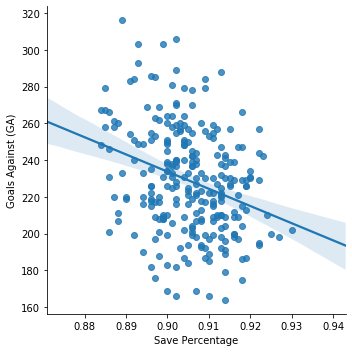

In [131]:
sns.lmplot('Save Percentage', 'Goals Against (GA)', data = df_new)

Como era de se esperar, quanto maior a Save Percentage, menos gols são sofridos

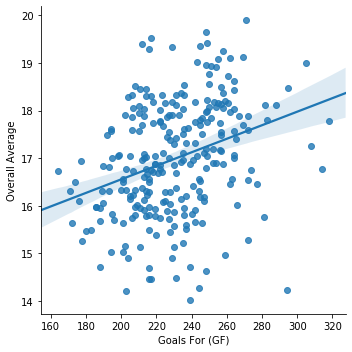

In [132]:
sns.lmplot('Goals For (GF)', 'Overall Average', data = df_new)

Quanto maior a média de público, maior a quantidade de gols feitos, o público influencia no ânimo dos artilheiros

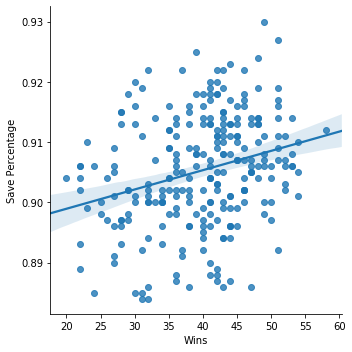

In [133]:
sns.lmplot('Wins', 'Save Percentage', data = df_new)

Quanto maior a porcentagem de defesa, maiores são as quantidades de vitórias. Uma boa taxa de defesa de penalty é um bom indicativo pra um alto número de vitórias

# fim